### CIFAR10 Classification

In [55]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [56]:
# Hyper Parameters
# torch.manual_seed(40)
batch_size = 16
EPOCH = 10
lr = 0.01

In [57]:
# Dataset & DataLoader

transform = transforms.Compose(
[
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
])

trainset = torchvision.datasets.CIFAR10(root = '../data', train = True,
                                      download = True, transform=transform)

trainloader = torch.utils.data.DataLoader(dataset=trainset, batch_size = batch_size,
                                          shuffle = True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root = '../data', train = False,
                                     download = True, transform=transform)

testloader = torch.utils.data.DataLoader(dataset=testset, batch_size = batch_size,
                                         shuffle = True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(trainset)
print('*'*100)
print(testset)

Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
****************************************************************************************************
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([16, 3, 32, 32])


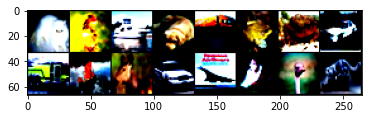

In [47]:
# Visualization Datasets

def show(img):
    print(img.size())
    grid = torchvision.utils.make_grid(img, padding = 1) # make_grid 함수는 3채널로 만든다(모두 같은 format으로)
    tranimg = grid.permute(1,2,0)
    plt.imshow(tranimg)

images, labels = iter(trainloader).next()

show(images[:32])
plt.savefig('aaaa.jpg')

In [62]:
# Make Model

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 5)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.conv3 = nn.Conv2d(20, 20, 5)
        self.conv4 = nn.Conv2d(20, 10, 5)
        self.conv5 = nn.Conv2d(10, 10, 5)
        self.pool = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(10 * 6 * 6, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x): # 32 32
        x = F.relu(self.conv1(x)) # 28 28
        x = F.relu(self.conv2(x)) # 24 24
        x = F.relu(self.conv3(x)) # 20 20
        x = F.relu(self.conv4(x)) # 16 16
        x = F.relu(self.conv5(x)) # 12 12
        x = self.pool(x)          # 6 6
        x = x.view(-1, 10 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return x   
    
model = Net()

In [6]:
# Make Model

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 7, padding = 3)
        self.conv2 = nn.Conv2d(10, 50, 7, padding = 3)
        self.conv3 = nn.Conv2d(50, 120, 7, padding = 3)
        self.conv4 = nn.Conv2d(120, 100, 5)
        self.conv5 = nn.Conv2d(100, 20, 5)
        self.conv6 = nn.Conv2d(20, 10, 5)
        self.conv7 = nn.Conv2d(10, 10, 3)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(10 * 10 * 10, 120)
        self.fc2 = nn.Linear(120, 360)
        self.fc3 = nn.Linear(360, 50)
        self.fc4 = nn.Linear(50, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x)) # 32 32
        x = F.relu(self.conv2(x)) # 32 32
        x = F.relu(self.conv3(x)) # 32 32
        x = F.relu(self.conv4(x)) # 28 28
        x = F.relu(self.conv5(x)) # 24 24
        x = self.pool(F.relu(self.conv6(x))) # 10 10
        x = x.view(-1, 10 * 10 * 10)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return x   

## GPU 사용여부 확인

In [63]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


In [26]:
# Weight 초기화
def weight_init(m):
    if ((type(m) == nn.Conv2d) or (type(m) == nn.Linear)):
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0)
        
model.apply(weight_init)

Net(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(20, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv5): Conv2d(10, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=360, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [67]:
import torch.optim as optim

loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 30, gamma = 0.1)
print(loss_func, optimizer)

CrossEntropyLoss() SGD (
Parameter Group 0
    dampening: 0
    initial_lr: 0.01
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [65]:
model.eval()
model.to(device)

with torch.no_grad():
    images, labels = next(iter(trainloader))
    images, labels = images.to(device), labels.to(device)
    
    example = model(images)
    
    print(example.size())
    print('Test : ', example)

torch.Size([16, 10])
Test :  tensor([[ 0.1032, -0.1221,  0.0394,  0.0119, -0.0315,  0.0116, -0.0928,  0.0652,
         -0.0257,  0.0550],
        [ 0.1041, -0.1226,  0.0386,  0.0122, -0.0324,  0.0123, -0.0932,  0.0645,
         -0.0250,  0.0553],
        [ 0.1044, -0.1221,  0.0395,  0.0121, -0.0315,  0.0119, -0.0930,  0.0643,
         -0.0258,  0.0554],
        [ 0.1038, -0.1220,  0.0390,  0.0120, -0.0316,  0.0119, -0.0928,  0.0646,
         -0.0256,  0.0554],
        [ 0.1037, -0.1223,  0.0391,  0.0122, -0.0312,  0.0117, -0.0931,  0.0646,
         -0.0255,  0.0557],
        [ 0.1036, -0.1219,  0.0386,  0.0118, -0.0318,  0.0119, -0.0929,  0.0645,
         -0.0256,  0.0551],
        [ 0.1037, -0.1215,  0.0386,  0.0117, -0.0317,  0.0118, -0.0926,  0.0648,
         -0.0260,  0.0552],
        [ 0.1037, -0.1220,  0.0393,  0.0116, -0.0317,  0.0116, -0.0926,  0.0644,
         -0.0256,  0.0550],
        [ 0.1038, -0.1220,  0.0384,  0.0117, -0.0321,  0.0119, -0.0931,  0.0653,
         -0.0251, 

In [68]:
import time

# Train

model.train()
for e in range(1, EPOCH+1):
    start_time = time.time()
    running_loss = 0
    
        
    for i, data in enumerate(trainloader):
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss
        now = time.time()

        print('\r[%d/%d]-----[%d/%d] LOSS : %.3f------ Time : %d ' 
              %(e, EPOCH, i+1, 50000/batch_size, running_loss, now - start_time), end = '')        
    print('\n')

[1/10]-----[3125/3125] LOSS : 4602.747------ Time : 12 

[2/10]-----[3125/3125] LOSS : 4342.556------ Time : 12 

[3/10]-----[3125/3125] LOSS : 4199.608------ Time : 12 

[4/10]-----[3125/3125] LOSS : 4085.875------ Time : 12 

[5/10]-----[3125/3125] LOSS : 3990.505------ Time : 12 

[6/10]-----[3125/3125] LOSS : 3912.424------ Time : 12 

[7/10]-----[3125/3125] LOSS : 3834.343------ Time : 12 

[8/10]-----[3125/3125] LOSS : 3763.016------ Time : 12 

[9/10]-----[3125/3125] LOSS : 3684.760------ Time : 12 

[10/10]-----[3125/3125] LOSS : 3619.109------ Time : 12 



In [17]:
import time

# Train

model.train()
for e in range(1, EPOCH+1):
    start_time = time.time()
    running_loss = 0
    
    for param_group in optimizer.param_groups:
        learning_rate = param_group['lr']
        
    for i, data in enumerate(trainloader):
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss
        now = time.time()

        print('\r[%d/%d]-----[%d/%d] LOSS : %.3f------ Time : %d ------- Current lr : %f' 
              %(e, EPOCH, i+1, 60000/batch_size, running_loss, now - start_time, learning_rate), end = '')    
    scheduler.step()        
    print('\n')

[1/10]-----[6250/7500] LOSS : 14400.677------ Time : 20 ------- Current lr : 0.050000

[2/10]-----[6250/7500] LOSS : 14400.625------ Time : 20 ------- Current lr : 0.050000

[3/10]-----[6250/7500] LOSS : 14401.487------ Time : 21 ------- Current lr : 0.050000

[4/10]-----[6250/7500] LOSS : 14399.734------ Time : 20 ------- Current lr : 0.050000

[5/10]-----[6250/7500] LOSS : 14400.587------ Time : 20 ------- Current lr : 0.050000

[6/10]-----[6250/7500] LOSS : 14399.898------ Time : 20 ------- Current lr : 0.050000

[7/10]-----[6250/7500] LOSS : 14400.886------ Time : 20 ------- Current lr : 0.050000

[8/10]-----[6250/7500] LOSS : 14401.681------ Time : 20 ------- Current lr : 0.050000

[9/10]-----[6250/7500] LOSS : 14400.815------ Time : 20 ------- Current lr : 0.050000

[10/10]-----[6250/7500] LOSS : 14401.087------ Time : 20 ------- Current lr : 0.050000



In [12]:
torch.save(model, '../data/mnist_classifier.pth')
test_model = torch.load('../data/mnist_classifier.pth')
test_model

Net(
  (conv1): Conv2d(3, 10, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv2): Conv2d(10, 50, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv3): Conv2d(50, 120, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv4): Conv2d(120, 100, kernel_size=(5, 5), stride=(1, 1))
  (conv5): Conv2d(100, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv6): Conv2d(20, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv7): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1000, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=360, bias=True)
  (fc3): Linear(in_features=360, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=10, bias=True)
)

torch.Size([8, 3, 32, 32])
GroundTruth :  plane deer horse deer plane deer truck frog
Predicted :  truck cat dog horse plane frog car frog


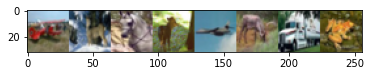

In [15]:
model.eval()
with torch.no_grad():
    classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    
    test_data = iter(testloader)
    test_images, test_labels = iter(testloader).next()
    show(test_images[:8])
    test_images, test_labels = test_images[:8].to(device), test_labels[:8].to(device)
    
    test_outputs = test_model(test_images)
    predicted = test_outputs.argmax(dim=1)
    
    
    print('GroundTruth : ', ' '.join(classes[test_labels[j]] for j in range(8)))
    print('Predicted : ', ' '.join(classes[predicted[i]] for i in range(8)))


In [16]:
correct = 0
test_loss = 0
model.eval()

with torch.no_grad():
    for data in testloader:
        val_images, val_labels = data
        val_images, val_labels = val_images.to(device), val_labels.to(device)
        
        val_outputs = model(val_images)
        pred = val_outputs.argmax(dim=1, keepdim=True)
        correct += pred.eq(val_labels.view_as(pred)).sum().item()
        
        
print('Accuracy of the network on the 10000 test images : %.3f %%' 
      %(100 * correct / len(testloader.dataset)))

Accuracy of the network on the 10000 test images : 46.370 %
